In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [54]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


In [55]:
train_labels = train_df['SalePrice']
train_df.drop(['SalePrice'], axis=1, inplace=True)
combined = pd.concat([train_df, test_df], axis=0)

In [56]:
for column in combined.columns:
    if combined[column].dtype == "object":
        combined[column] = combined[column].fillna(combined[column].mode()[0])
        combined[column] = LabelEncoder().fit_transform(combined[column])
    else:
        combined[column] = combined[column].fillna(combined[column].median())

In [57]:
combined.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [58]:
X_train = combined.iloc[:len(train_labels), :]
X_test = combined.iloc[len(train_labels):, :]

In [59]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, train_labels, test_size=0.2, random_state=42
)


In [60]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

RandomForestRegressor(random_state=42)

In [61]:
predictions = model.predict(X_test)

In [62]:
mae = mean_absolute_error(y_val_split, val_preds)
rmse = np.sqrt(mean_squared_error(y_val_split, val_preds))
r2 = r2_score(y_val_split, val_preds)
mape = np.mean(np.abs((y_val_split - val_preds) / y_val_split)) * 100
accuracy = 100 - mape

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f} ({r2*100:.2f}%)")
print(f"MAPE: {mape:.2f}%")
print(f"Approx. Accuracy: {accuracy:.2f}%")

MAE: 17604.53
RMSE: 28252.77
R² Score: 0.8959 (89.59%)
MAPE: 10.82%
Approx. Accuracy: 89.18%


In [64]:
pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 10.5 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 9.9 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 9.8 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------- ------- 1.8/2.2 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.5 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


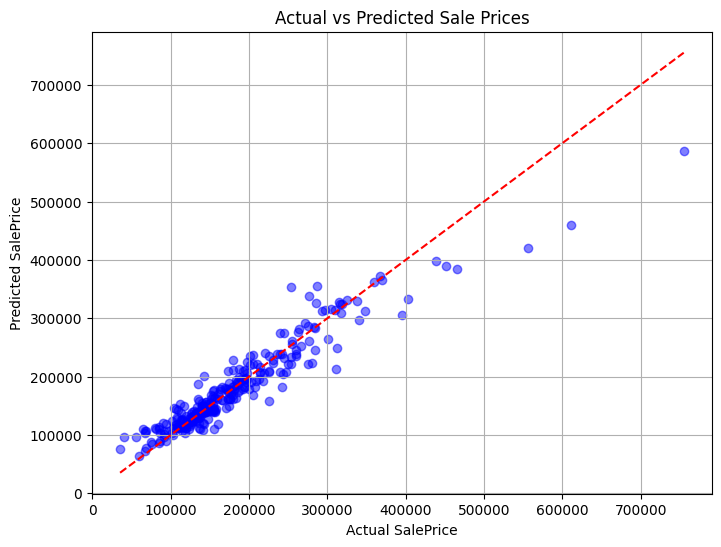

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_val_split, val_preds, alpha=0.5, color='blue')
plt.plot([y_val_split.min(), y_val_split.max()], [y_val_split.min(), y_val_split.max()], 'r--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted Sale Prices')
plt.grid(True)
plt.show()


In [ ]:

model.fit(X_train, train_labels)

RandomForestRegressor(random_state=42)

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_preds
})
submission.to_csv("submission.csv", index=False)
